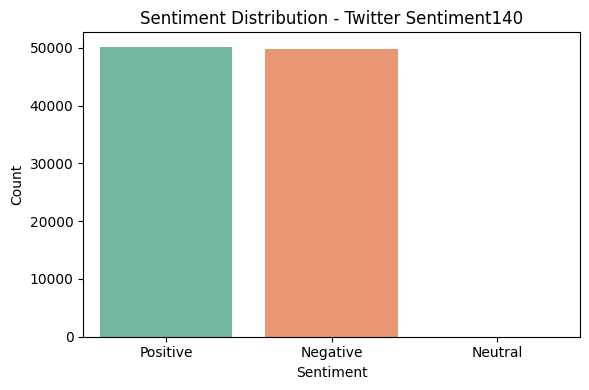

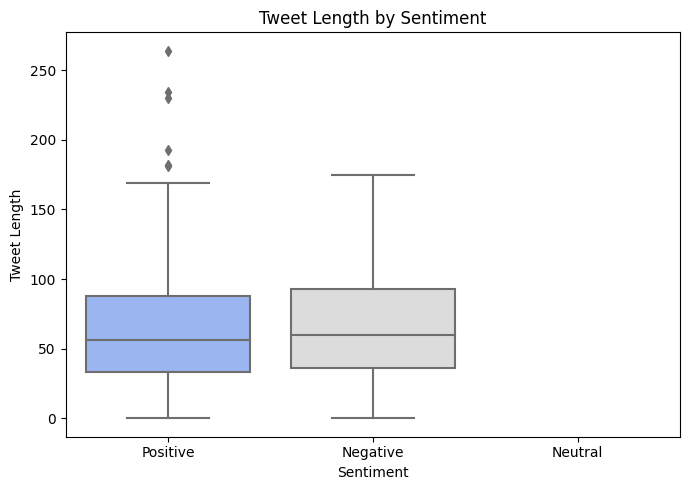

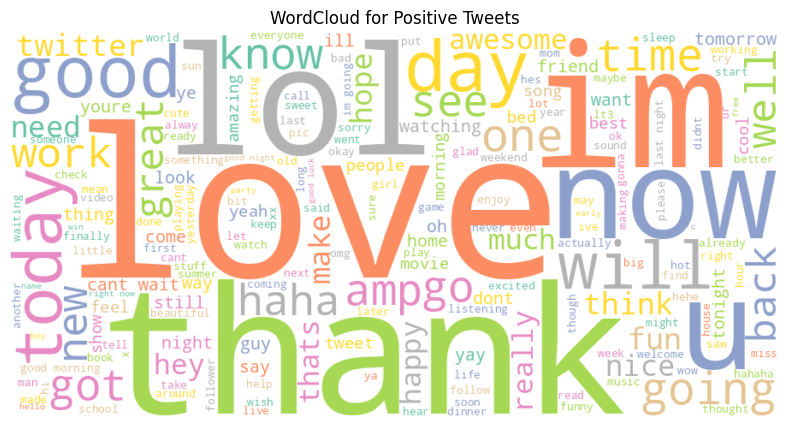

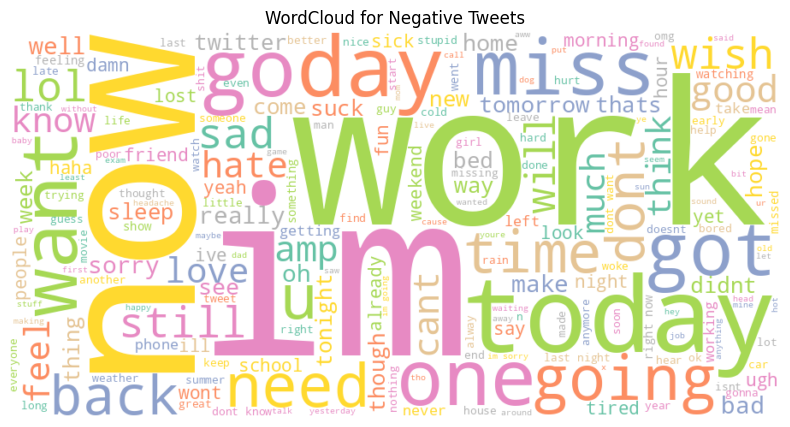

Skipping Neutral: No tweets available
No hashtags found in sample.


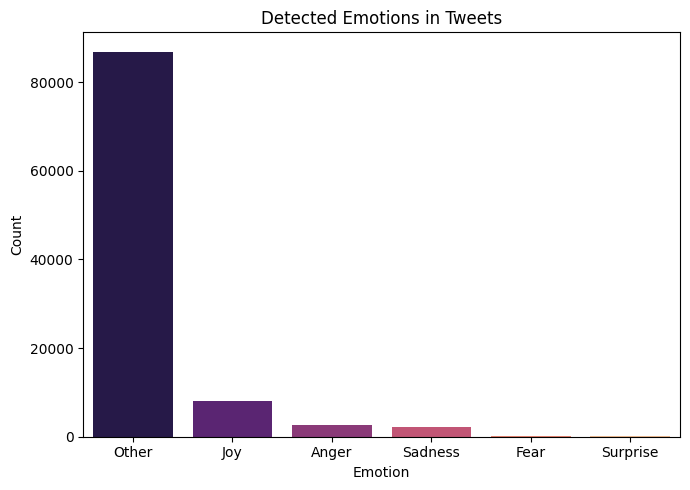

Advanced Sentiment Analysis complete - images saved in visuals/


In [15]:
# Task 4: Advanced Sentiment Analysis on Sentiment140 Twitter Dataset (Output & Save Images)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import os
from collections import Counter

# Create visuals folder
output_dir = "visuals"
os.makedirs(output_dir, exist_ok=True)

# Load Sentiment140 dataset
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='latin-1', names=columns)

# Sample for speed (100k tweets)
df = df.sample(100000, random_state=1)

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\\S+", "", text)
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)
    text = re.sub(r"#[A-Za-z0-9_]+", "", text)
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub("\\s+", " ", text).strip()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Map sentiment labels
df['sentiment'] = df['target'].map({0: 'Negative', 2: 'Neutral', 4: 'Positive'})

# --- Sentiment Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2', order=['Positive','Negative','Neutral'])
plt.title("Sentiment Distribution - Twitter Sentiment140")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "sentiment_distribution_twitter140.png"))
plt.show()

# --- Tweet Length vs Sentiment ---
df['tweet_length'] = df['cleaned_text'].apply(len)
plt.figure(figsize=(7,5))
sns.boxplot(x='sentiment', y='tweet_length', data=df, palette='coolwarm', order=['Positive','Negative','Neutral'])
plt.title("Tweet Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "tweet_length_by_sentiment.png"))
plt.show()

# --- WordClouds for each sentiment ---
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text_data = df[df['sentiment'] == sentiment]['cleaned_text']
    if text_data.empty:
        print(f"Skipping {sentiment}: No tweets available")
        continue
    text = " ".join(text_data)
    if len(text.strip()) == 0:
        print(f"Skipping {sentiment}: No words found")
        continue
    wordcloud = WordCloud(width=900, height=450, background_color='white', colormap='Set2').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.savefig(os.path.join(output_dir, f"wordcloud_{sentiment.lower()}_twitter140.png"))
    plt.show()

# --- Hashtag Frequency Analysis ---
def extract_hashtags(text):
    return re.findall(r"#\\w+", text)

df['hashtags'] = df['text'].apply(extract_hashtags)
all_hashtags = [tag.lower() for tags in df['hashtags'] for tag in tags]

most_common_hashtags = Counter(all_hashtags).most_common(15)
if most_common_hashtags:
    hashtag_df = pd.DataFrame(most_common_hashtags, columns=['Hashtag', 'Count'])
    plt.figure(figsize=(8,5))
    sns.barplot(x='Count', y='Hashtag', data=hashtag_df, palette='viridis')
    plt.title("Top 15 Hashtags in Tweets")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "top_hashtags_twitter140.png"))
    plt.show()
else:
    print("No hashtags found in sample.")

# --- Emotion Detection ---
emotion_lexicon = {
    'happy': 'Joy', 'joy': 'Joy', 'love': 'Joy', 'excited': 'Joy',
    'angry': 'Anger', 'hate': 'Anger', 'mad': 'Anger',
    'sad': 'Sadness', 'cry': 'Sadness', 'unhappy': 'Sadness',
    'fear': 'Fear', 'scared': 'Fear', 'afraid': 'Fear',
    'surprise': 'Surprise', 'shocked': 'Surprise'
}

def detect_emotion(text):
    for word, emotion in emotion_lexicon.items():
        if word in text:
            return emotion
    return 'Other'

df['emotion'] = df['cleaned_text'].apply(detect_emotion)
plt.figure(figsize=(7,5))
sns.countplot(x='emotion', data=df, palette='magma', order=df['emotion'].value_counts().index)
plt.title("Detected Emotions in Tweets")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "emotions_twitter140.png"))
plt.show()

print(f"Advanced Sentiment Analysis complete - images saved in {output_dir}/")
